Accuracy is:  0.9555555555555556
Confusion Matrix is: [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


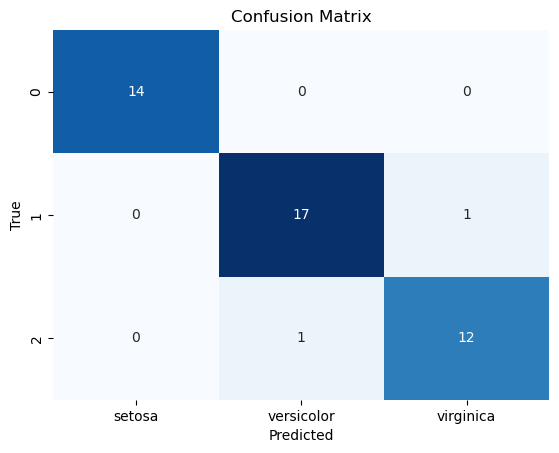

In [5]:
from sklearn import datasets

dataset=datasets.load_iris()
x=dataset.data
y=dataset.target


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

from sklearn import metrics

accuracy=metrics.accuracy_score(y_test,y_pred)
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print("Accuracy is: ",accuracy)
print("Confusion Matrix is:",confusion_matrix)

labels=dataset.target_names

import seaborn as sns

sns.heatmap(confusion_matrix,annot=True,fmt="d",xticklabels=labels,cmap="Blues",cbar=False)

import matplotlib.pyplot as plt

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [14]:
#Pract2

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/rcdbe/bigdatacertification/master/dataset/churn_trasnsformed_new.csv'
df_csv = pd.read_csv(url, sep=',')
df = df_csv.drop("Unnamed: 0", axis=1)

mm_scaler = MinMaxScaler()
column_names = df.columns.tolist()
column_names.remove('Churn')
df[column_names] = mm_scaler.fit_transform(df[column_names])
df.sort_index(inplace=True)

train_feature = df.drop(['Churn'], axis=1)
train_target = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    train_feature, train_target, test_size=0.3, random_state=1
)


In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(hidden_layer_sizes=(5), activation='relu', solver='adam', max_iter=10000, verbose=True)
mlp.fit(X_train, y_train)

y_predmlp = mlp.predict(X_test)

print('Number of Layers =', mlp.n_layers_)
print('Number of Iterations =', mlp.n_iter_)
print('Current Loss =', mlp.loss_)

cnf_matrixmlp = metrics.confusion_matrix(y_test, y_predmlp)

acc_mlp = metrics.accuracy_score(y_test, y_predmlp)
prec_mlp = metrics.precision_score(y_test, y_predmlp)
rec_mlp = metrics.recall_score(y_test, y_predmlp)
f1_mlp = metrics.f1_score(y_test, y_predmlp)
kappa_mlp = metrics.cohen_kappa_score(y_test, y_predmlp)

print(f"Accuracy: {acc_mlp:.2f}")
print(f"Precision: {prec_mlp:.2f}")
print(f"Recall: {rec_mlp:.2f}")
print(f"F1 Score: {f1_mlp:.2f}")
print(f"Cohen's Kappa Score: {kappa_mlp:.2f}")


Iteration 1, loss = 0.67079303
Iteration 2, loss = 0.54812963
Iteration 3, loss = 0.51422596
Iteration 4, loss = 0.49894057
Iteration 5, loss = 0.48641147
Iteration 6, loss = 0.47631484
Iteration 7, loss = 0.46902664
Iteration 8, loss = 0.46311389
Iteration 9, loss = 0.45896331
Iteration 10, loss = 0.45568537
Iteration 11, loss = 0.45274449
Iteration 12, loss = 0.45046992
Iteration 13, loss = 0.44879379
Iteration 14, loss = 0.44712944
Iteration 15, loss = 0.44622943
Iteration 16, loss = 0.44460924
Iteration 17, loss = 0.44337876
Iteration 18, loss = 0.44249001
Iteration 19, loss = 0.44147782
Iteration 20, loss = 0.44071077
Iteration 21, loss = 0.44014349
Iteration 22, loss = 0.43943297
Iteration 23, loss = 0.43861808
Iteration 24, loss = 0.43803805
Iteration 25, loss = 0.43748870
Iteration 26, loss = 0.43708683
Iteration 27, loss = 0.43647040
Iteration 28, loss = 0.43635984
Iteration 29, loss = 0.43614042
Iteration 30, loss = 0.43515889
Iteration 31, loss = 0.43507888
Iteration 32, los

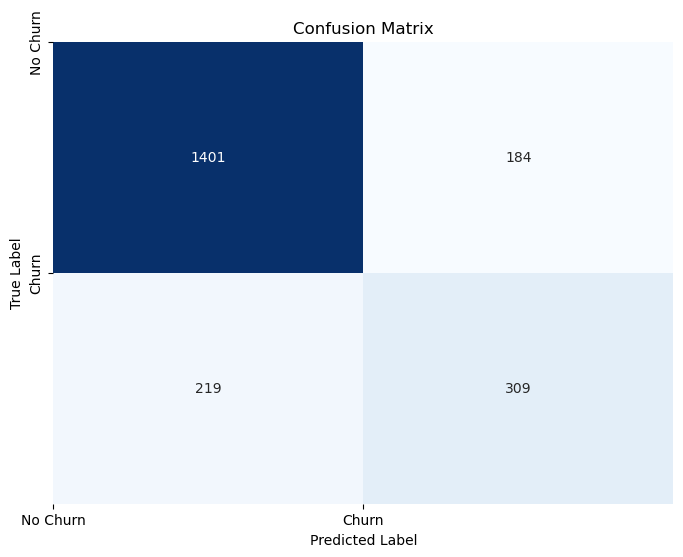

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrixmlp, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')

plt.show()


In [25]:
#Pract3

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset from CSV
data = pd.read_csv('golf-dataset.csv')

# Encode categorical variables
data = pd.get_dummies(data, columns=['Outlook', 'Temp', 'Humidity', 'Windy'])

# Label encode the target column
label_encoder = LabelEncoder()
data['Play Golf'] = label_encoder.fit_transform(data['Play Golf'])

# Separate features and target
x = data.drop(columns=['Play Golf']).values
y = data['Play Golf'].values



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train the Naive Bayes model
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

Confusion Matrix:
            Predicted No  Predicted Yes
Actual No              0              0
Actual Yes             3              1


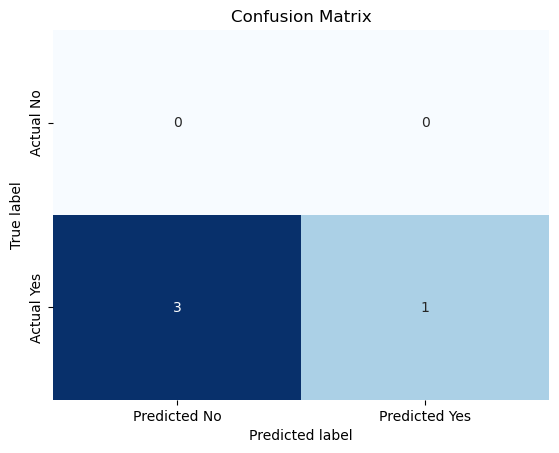

Accuracy: 0.25


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = classifier.predict(x_test)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion, index=['Actual No', 'Actual Yes'], 
                            columns=['Predicted No', 'Predicted Yes'])

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_df)

# Plot the confusion matrix
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [51]:
#pract4

The dimensions of the dataset: (18, 3)
0           Rainy Hot High FALSE No
1            Rainy Hot High TRUE No
2       Overcast Hot High FALSE Yes
3         Sunny Mild High FALSE Yes
4       Sunny Cool Normal FALSE Yes
5         Sunny Cool Normal TRUE No
6     Overcast Cool Normal TRUE Yes
7          Rainy Mild High FALSE No
8       Rainy Cool Normal FALSE Yes
9       Sunny Mild Normal FALSE Yes
10       Rainy Mild Normal TRUE Yes
11      Overcast Mild High TRUE Yes
12    Overcast Hot Normal FALSE Yes
13          Sunny Mild High TRUE No
14          Clear Hot High TRUE Yes
15       Rainy Hot Normal FALSE Yes
16          Sunny Cool High TRUE No
17    Overcast Mild Normal TRUE Yes
Name: message, dtype: object
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    1
Name: labelnum, dtype: int64

The total number of Training Data: (14,)

The total number of Test Data: (4,)

The words or Tokens in the text

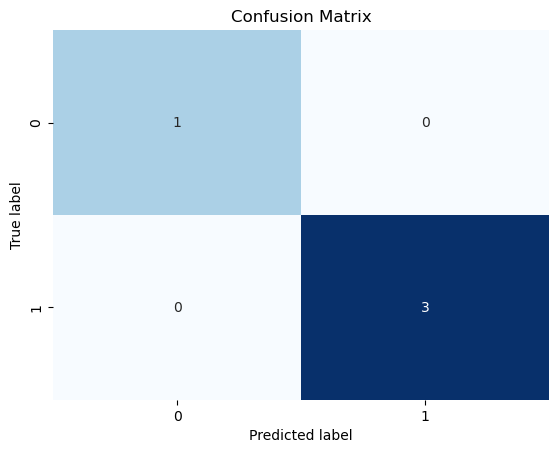

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'message': [
        'Rainy Hot High FALSE No',
        'Rainy Hot High TRUE No',
        'Overcast Hot High FALSE Yes',
        'Sunny Mild High FALSE Yes',
        'Sunny Cool Normal FALSE Yes',
        'Sunny Cool Normal TRUE No',
        'Overcast Cool Normal TRUE Yes',
        'Rainy Mild High FALSE No',
        'Rainy Cool Normal FALSE Yes',
        'Sunny Mild Normal FALSE Yes',
        'Rainy Mild Normal TRUE Yes',
        'Overcast Mild High TRUE Yes',
        'Overcast Hot Normal FALSE Yes',
        'Sunny Mild High TRUE No',
        'Clear Hot High TRUE Yes',
        'Rainy Hot Normal FALSE Yes',
        'Sunny Cool High TRUE No',
        'Overcast Mild Normal TRUE Yes'
    ],
    'label': [
        'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 
        'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 
        'neg', 'pos'
    ]
}

msg = pd.DataFrame(data)
msg['labelnum'] = msg.label.map({'pos': 1, 'neg': 0})

if msg['labelnum'].isnull().any():
    msg = msg.dropna(subset=['labelnum'])

print('The dimensions of the dataset:', msg.shape)

X = msg.message
y = msg.labelnum
print(X)
print(y)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=4, random_state=4)
print('\nThe total number of Training Data:', ytrain.shape)
print('\nThe total number of Test Data:', ytest.shape)

count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm = count_vect.transform(xtest)

print('\nThe words or Tokens in the text documents:')
print(count_vect.get_feature_names_out())
df = pd.DataFrame(xtrain_dtm.toarray(), columns=count_vect.get_feature_names_out())

clf = MultinomialNB().fit(xtrain_dtm, ytrain)
predicted = clf.predict(xtest_dtm)

print('\nAccuracy of the classifier is:', metrics.accuracy_score(ytest, predicted))
print('\nConfusion matrix:')
confusion = metrics.confusion_matrix(ytest, predicted)
print(confusion)

print('\nThe value of Precision:', metrics.precision_score(ytest, predicted))
print('\nThe value of Recall:', metrics.recall_score(ytest, predicted))
print('\nThe value of f1 score:', metrics.f1_score(ytest, predicted))

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [62]:
#pract5

In [102]:
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

data = pd.read_csv("ds4.csv")
heart_disease = pd.DataFrame(data)
print(heart_disease)

model = BayesianModel([
    ('age', 'Lifestyle'),
    ('Gender', 'Lifestyle'),
    ('Family', 'heartdisease'),
    ('diet', 'cholestrol'),
    ('Lifestyle', 'diet'),
    ('cholestrol', 'heartdisease'),
    ('diet', 'cholestrol')
])

model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

HeartDisease_infer = VariableElimination(model)

print('For Age enter SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4')
print('For Gender enter Male:0, Female:1')
print('For Family History enter Yes:1, No:0')
print('For Diet enter High:0, Medium:1')
print('for LifeStyle enter Athlete:0, Active:1, Moderate:2, Sedentary:3')
print('for Cholesterol enter High:0, BorderLine:1, Normal:2')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age': int(input('Enter Age: ')),
    'Gender': int(input('Enter Gender: ')),
    'Family': int(input('Enter Family History: ')),
    'diet': int(input('Enter Diet: ')),
    'Lifestyle': int(input('Enter Lifestyle: ')),
    'cholestrol': int(input('Enter Cholestrol: '))
})

print(q)

    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0          

Enter Age:  1
Enter Gender:  0
Enter Family History:  1
Enter Diet:  0
Enter Lifestyle:  0
Enter Cholestrol:  2


+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.8333 |
+-----------------+---------------------+
| heartdisease(1) |              0.1667 |
+-----------------+---------------------+


In [107]:
#PRACTICAL 6

C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'GMM Classification')

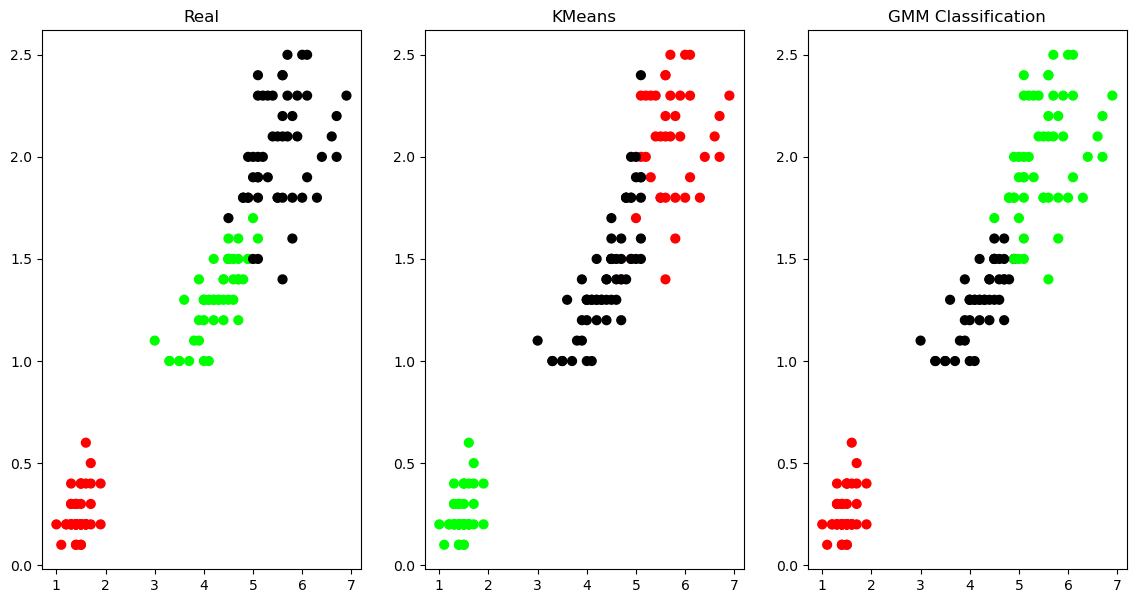

In [109]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset=load_iris()
# print(dataset)
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']
# print(X)
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Real')

# K-PLOT
plt.subplot(1,3,2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_,[0,1,2]).astype(np.int64)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[predY],s=40)
plt.title('KMeans')

# GMM PLOT
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa,columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1,3,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm],s=40)
plt.title('GMM Classification')

In [114]:
#Pract7

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


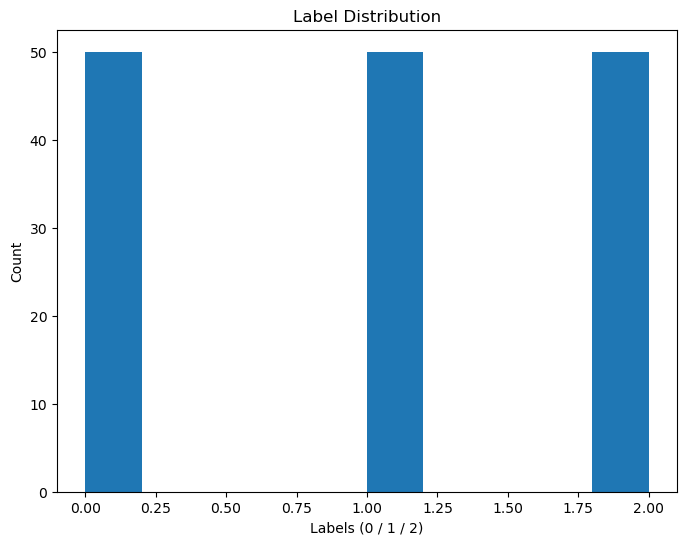

Target 0 is setosa
Target 1 is versicolor
Target 2 is virginica


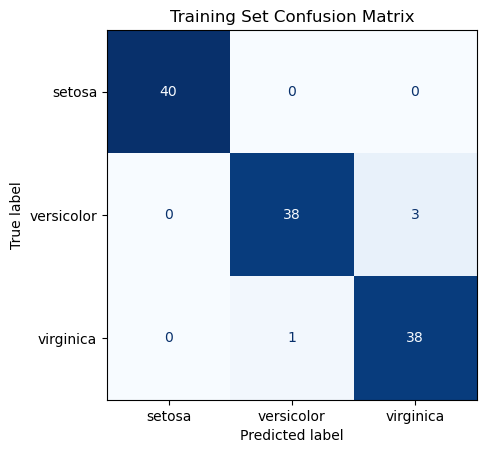

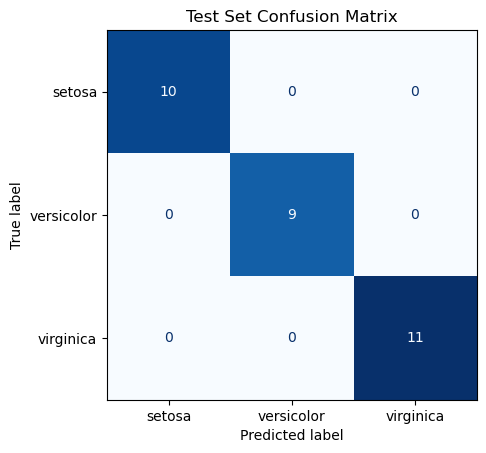

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ setosa       │           1 │        1 │          1 │        10 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ versicolor   │           1 │        1 │          1 │         9 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ virginica    │           1 │        1 │          1 │        11 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │           1 │        1 │          1 │         1 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │           1 │        1 │          1 │        30 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │           1 │        1 │          1 │        30 │
╘══════════════╧═════════════╧══════════╧════════════╧════════

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate  # Import tabulate

data = load_iris()
X = data.data
Y = data.target
classes = data.target_names

df = pd.DataFrame(X, columns=data.feature_names)
print(df.head())

plt.figure(figsize=(8, 6))
plt.hist(Y, rwidth=1)
plt.title('Label Distribution')
plt.xlabel('Labels (0 / 1 / 2)')
plt.ylabel('Count')
plt.show()

for i, name in enumerate(classes):
    print(f"Target {i} is {name}")

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

confusion_train = confusion_matrix(y_train, y_pred_train)
conf_display_train = ConfusionMatrixDisplay(confusion_train, display_labels=classes)
conf_display_train.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Training Set Confusion Matrix')
plt.show()

confusion_test = confusion_matrix(y_test, y_pred)
conf_display_test = ConfusionMatrixDisplay(confusion_test, display_labels=classes)
conf_display_test.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Test Set Confusion Matrix')
plt.show()

classification_rep = classification_report(y_test, y_pred, target_names=classes, output_dict=True)
df_classification_rep = pd.DataFrame(classification_rep).transpose()
print(tabulate(df_classification_rep, headers='keys', tablefmt='fancy_grid'))


In [122]:
#Pract8

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


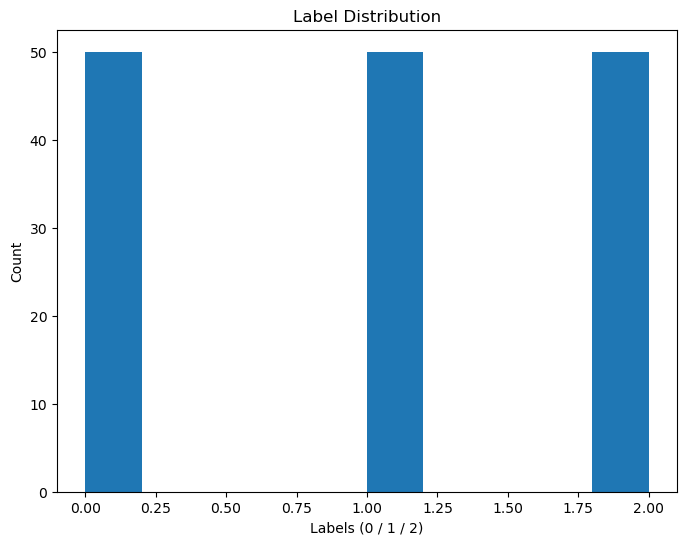

Target 0 is setosa
Target 1 is versicolor
Target 2 is virginica


KNeighborsClassifier()

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

data = load_iris()
X = data.data
Y = data.target
classes = data.target_names

df = pd.DataFrame(X, columns=data.feature_names)
print(df.head())

plt.figure(figsize=(8, 6))
plt.hist(Y, rwidth=1)
plt.title('Label Distribution')
plt.xlabel('Labels (0 / 1 / 2)')
plt.ylabel('Count')
plt.show()

for i, name in enumerate(classes):
    print(f"Target {i} is {name}")

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

model = KNeighborsClassifier()
model.fit(x_train, y_train)


Linear Regression Mean Squared Error: 0.037113794407976845
Logistic Regression Accuracy: 1.0


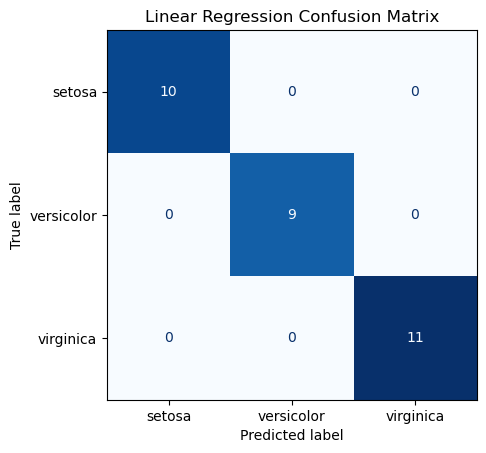

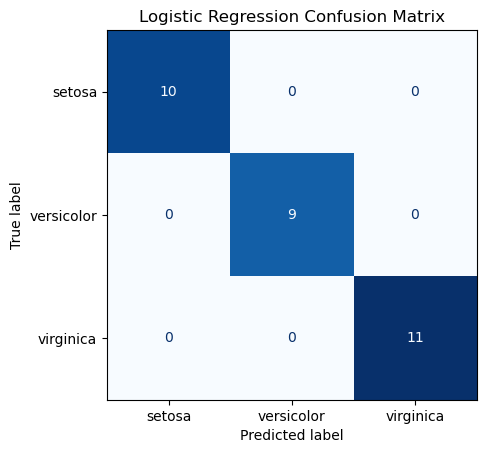

In [126]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)

logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(x_train, y_train)

y_pred_logistic = logistic_model.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

confusion_linear = confusion_matrix(y_test, np.round(y_pred_linear))
conf_display_linear = ConfusionMatrixDisplay(confusion_linear, display_labels=classes)
conf_display_linear.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Linear Regression Confusion Matrix')
plt.show()

confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
conf_display_logistic = ConfusionMatrixDisplay(confusion_logistic, display_labels=classes)
conf_display_logistic.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [132]:
#Pract 9

                Algorithm  Training Accuracy  Test Accuracy  Precision  \
0     Logistic Regression           0.975000            1.0        1.0   
1     k-Nearest Neighbors           0.966667            1.0        1.0   
2  Support Vector Machine           0.975000            1.0        1.0   
3          Decision Trees           1.000000            1.0        1.0   
4          Random Forests           1.000000            1.0        1.0   
5       Gradient Boosting           1.000000            1.0        1.0   
6         Neural Networks           0.975000            1.0        1.0   

   Recall  F1 Score  
0     1.0       1.0  
1     1.0       1.0  
2     1.0       1.0  
3     1.0       1.0  
4     1.0       1.0  
5     1.0       1.0  
6     1.0       1.0  


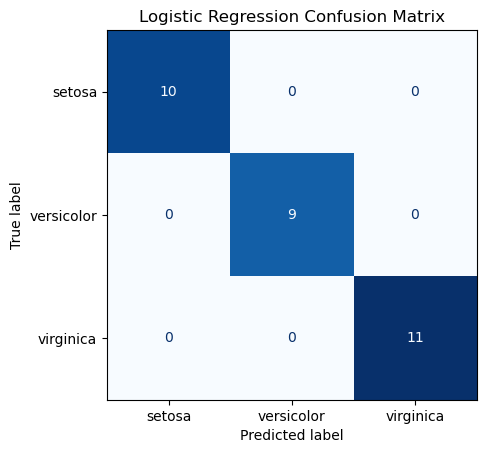

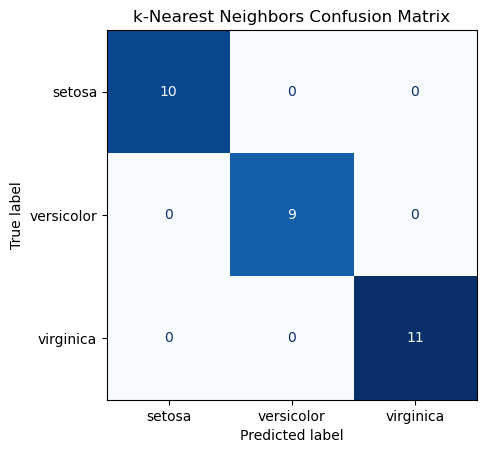

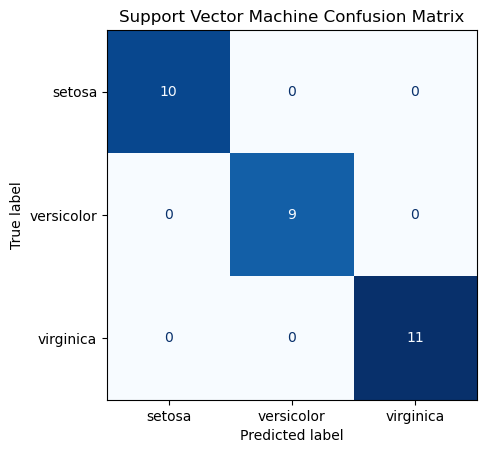

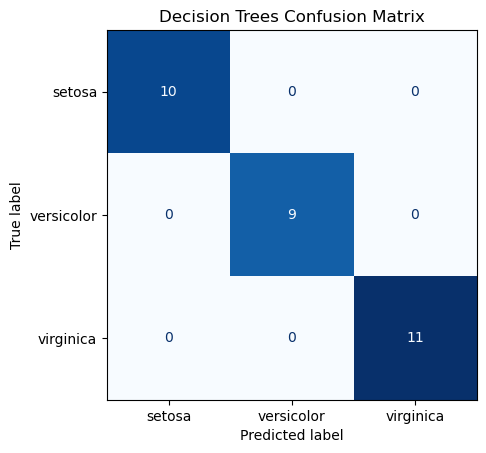

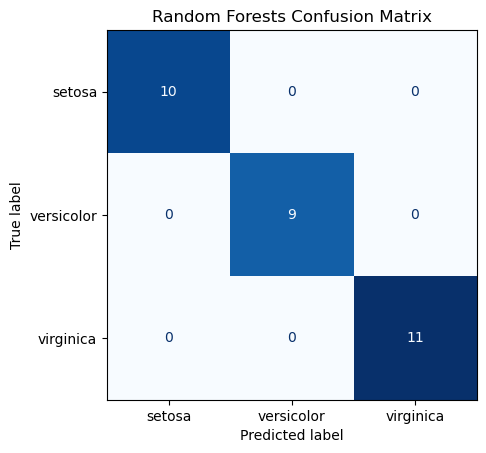

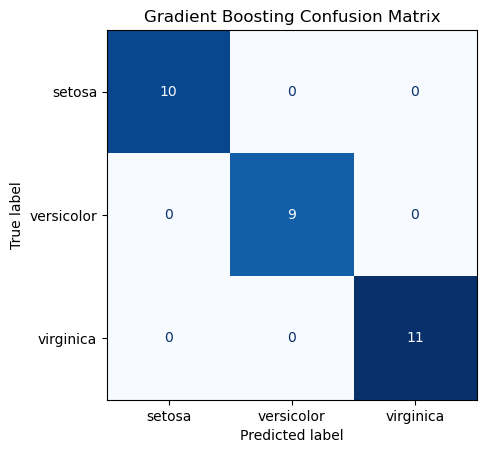

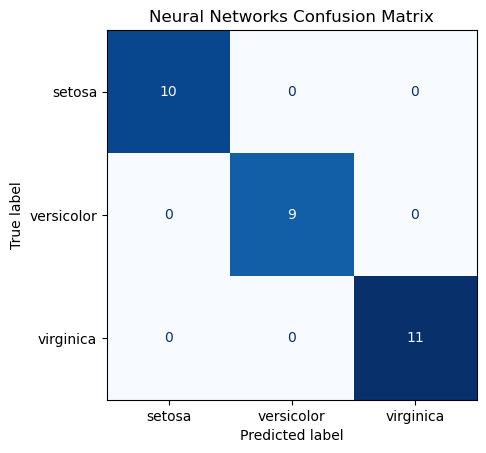

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Networks": MLPClassifier(max_iter=2000)
}

# Step 4: Train and evaluate the algorithms
results = {
    "Algorithm": [],
    "Training Accuracy": [],
    "Test Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute metrics
    results["Algorithm"].append(name)
    results["Training Accuracy"].append(accuracy_score(y_train, y_train_pred))
    results["Test Accuracy"].append(accuracy_score(y_test, y_test_pred))
    results["Precision"].append(precision_score(y_test, y_test_pred, average='weighted'))
    results["Recall"].append(recall_score(y_test, y_test_pred, average='weighted'))
    results["F1 Score"].append(f1_score(y_test, y_test_pred, average='weighted'))

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Step 5: Display the results
print(results_df)

# Visualization: Confusion Matrices
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    confusion = confusion_matrix(y_test, y_test_pred)
    conf_display = ConfusionMatrixDisplay(confusion, display_labels=classes)
    conf_display.plot(cmap=plt.cm.Blues, colorbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.show()


In [144]:
#Pract10

C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Silhouette Score: 0.434


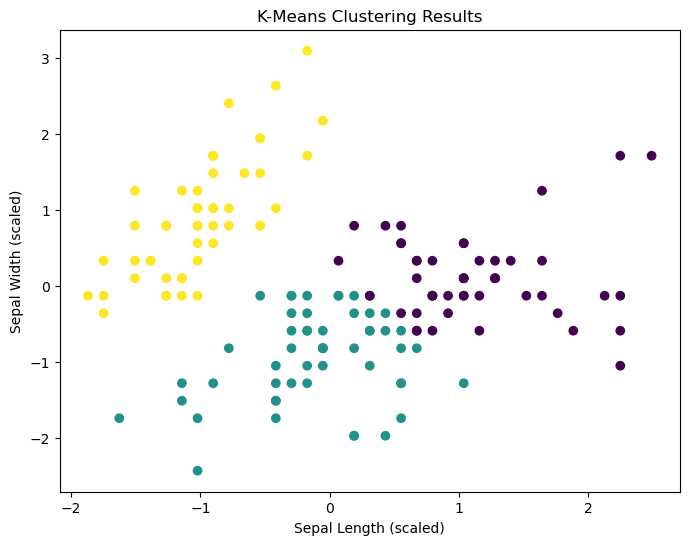

Hierarchical Silhouette Score: 0.439


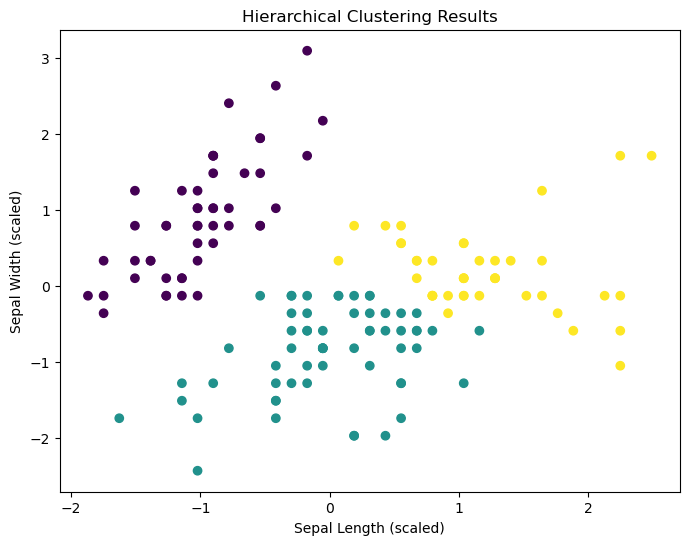

DBSCAN Silhouette Score: 0.392


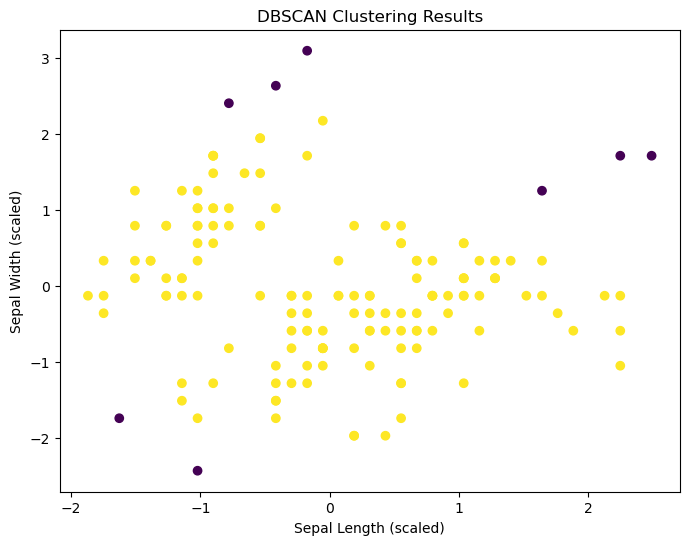

C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GMM Silhouette Score: 0.436


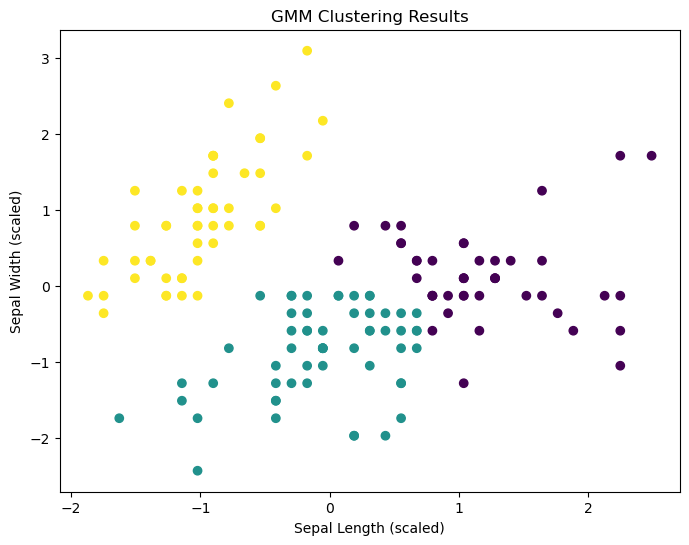

C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\utkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


      Algorithm  Silhouette Score
0       K-Means          0.434313
1  Hierarchical          0.438600
2        DBSCAN          0.391959
3           GMM          0.435544


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the Iris dataset
data = load_iris()
X = data.data[:, [0, 1]]  # Using Sepal Length and Sepal Width features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the clustering algorithms
algorithms = {
    'K-Means': KMeans(n_clusters=3, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=3, random_state=42)
}

# Function to visualize clustering results
def visualize_results(name, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f"{name} Clustering Results")
    plt.xlabel("Sepal Length (scaled)")
    plt.ylabel("Sepal Width (scaled)")
    plt.show()

# Evaluate each algorithm
for name, algorithm in algorithms.items():
    # Fit the algorithm to the data
    algorithm.fit(X_scaled)
    
    # Get the labels for the clusters
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
    else:
        labels = algorithm.predict(X_scaled)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"{name} Silhouette Score: {silhouette_avg:.3f}")
    
    # Visualize the clustering results
    visualize_results(name, labels)

# Final Comparison Tables
# Note: In actual use, you might want to save these results in a DataFrame for better presentation.
results = {
    'Algorithm': [],
    'Silhouette Score': [],
}

# Fill results for comparison
for name, algorithm in algorithms.items():
    algorithm.fit(X_scaled)
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
    else:
        labels = algorithm.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    
    results['Algorithm'].append(name)
    results['Silhouette Score'].append(silhouette_avg)

# Create a DataFrame for results
results_df = pd.DataFrame(results)
print(results_df)
